<a href="https://colab.research.google.com/github/jyryu3161/SyntheticBiology/blob/main/lec5_metabolic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 31.9 MB/s eta 0:00:00


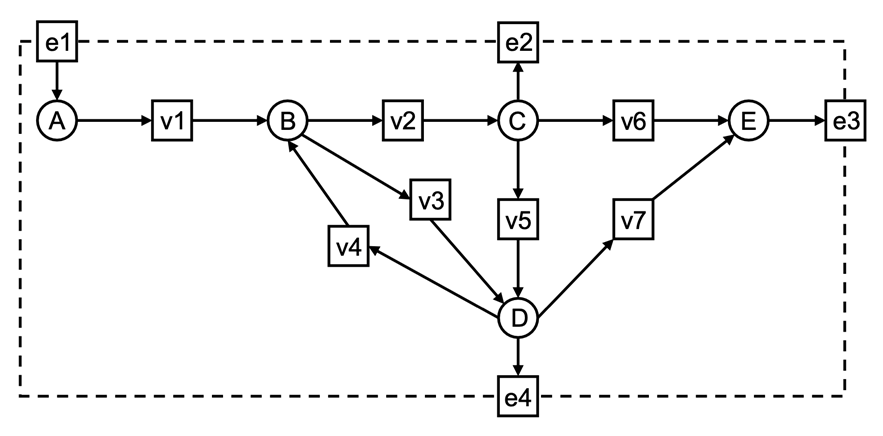

In [ ]:
from cobra import Model, Reaction, Metabolite

# 모델 생성
model = Model("example_metabolic_model")

# 메타볼라이트 정의
A = Metabolite('A', compartment='c')
B = Metabolite('B', compartment='c')
C = Metabolite('C', compartment='c')
D = Metabolite('D', compartment='c')
E = Metabolite('E', compartment='c')

# 반응 정의
v1 = Reaction('v1')
v1.name = 'A to B'
v1.lower_bound = 0
v1.upper_bound = 1000
v1.add_metabolites({A: -1, B: 1})

v2 = Reaction('v2')
v2.name = 'B to C'
v2.lower_bound = 0
v2.upper_bound = 1000
v2.add_metabolites({B: -1, C: 1})

v3 = Reaction('v3')
v3.name = 'B to D'
v3.lower_bound = 0
v3.upper_bound = 1000
v3.add_metabolites({B: -1, D: 1})

v4 = Reaction('v4')
v4.name = 'D to B'
v4.lower_bound = 0
v4.upper_bound = 1000
v4.add_metabolites({D: -1, B: 1})

v5 = Reaction('v5')
v5.name = 'C to D'
v5.lower_bound = 0
v5.upper_bound = 1000
v5.add_metabolites({C: -1, D: 1})

v6 = Reaction('v6')
v6.name = 'C to E'
v6.lower_bound = 0
v6.upper_bound = 1000
v6.add_metabolites({C: -1, E: 1})

v7 = Reaction('v7')
v7.name = 'D to E'
v7.lower_bound = 0
v7.upper_bound = 1000
v7.add_metabolites({D: -1, E: 1})

# Exchange reactions
e1 = Reaction('EX_A')
e1.name = 'Exchange A'
e1.lower_bound = -10  # uptake
e1.upper_bound = 1000
e1.add_metabolites({A: -1})

e2 = Reaction('EX_C')
e2.name = 'Exchange C'
e2.lower_bound = -10  #
e2.upper_bound = 1000
e2.add_metabolites({C: -1})

e3 = Reaction('EX_E')
e3.name = 'Exchange E'
e3.lower_bound = 0
e3.upper_bound = 1000  # secretion
e3.add_metabolites({E: -1})

e4 = Reaction('EX_D')
e4.name = 'Exchange D'
e4.lower_bound = 0
e4.upper_bound = 1000
e4.add_metabolites({D: -1})

# 모델에 반응 추가
model.add_reactions([v1, v2, v3, v4, v5, v6, v7, e1, e2, e3, e4])

# 모델 확인
print(f"Reactions: {[r.id for r in model.reactions]}")
print(f"Metabolites: {[m.id for m in model.metabolites]}")


Reactions: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'EX_A', 'EX_C', 'EX_E', 'EX_D']
Metabolites: ['A', 'B', 'C', 'D', 'E']


In [ ]:
from cobra.flux_analysis import flux_variability_analysis

# 1. EX_A uptake를 10으로 설정
model.reactions.EX_A.upper_bound = 1000.0  # 고정
model.reactions.EX_A.lower_bound = -10.0

# 2. 목적함수를 EX_D로 설정
model.objective = 'EX_D'

# 3. 모델 최적화
solution = model.optimize()

# 4. 결과 출력
print("최적화 상태:", solution.status)
print("EX_D 최대 flux:", solution.objective_value)
print("\n전체 flux 분포:")
for rxn in model.reactions:
    print(f"{rxn.id}: {solution.fluxes[rxn.id]:.2f}")


최적화 상태: optimal
EX_D 최대 flux: 20.0

전체 flux 분포:
v1: 10.00
v2: 0.00
v3: 10.00
v4: 0.00
v5: 10.00
v6: 0.00
v7: 0.00
EX_A: -10.00
EX_C: -10.00
EX_E: 0.00
EX_D: 20.00


# Theoretical yield

Theoretical yield refers to the maximum amount of product that can be generated from one unit of substrate. It represents the ideal production capacity that a metabolic network can achieve and is a key performance metric in fields such as metabolic engineering, systems biology, and bioprocess optimization.

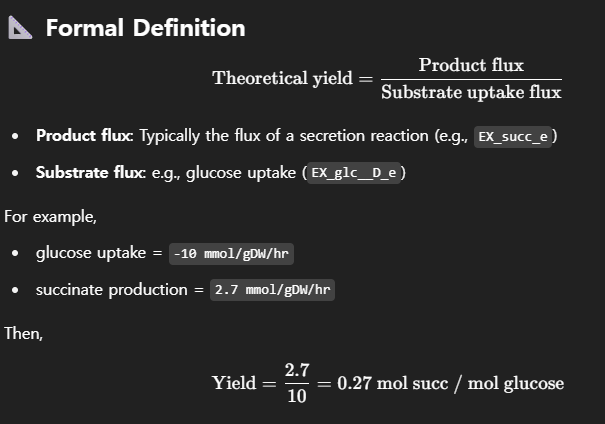

In [ ]:
!wget http://bigg.ucsd.edu/static/models/e_coli_core.xml
!wget http://bigg.ucsd.edu/static/models/iAF1260.xml


--2025-05-13 01:15:52--  http://bigg.ucsd.edu/static/models/e_coli_core.xml
Resolving bigg.ucsd.edu (bigg.ucsd.edu)... 169.228.33.117
Connecting to bigg.ucsd.edu (bigg.ucsd.edu)|169.228.33.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 707166 (691K) [application/xml]
Saving to: ‘e_coli_core.xml.1’

e_coli_core.xml.1   100%[===================>] 690.59K  1.66MB/s    in 0.4s    

2025-05-13 01:15:53 (1.66 MB/s) - ‘e_coli_core.xml.1’ saved [707166/707166]

--2025-05-13 01:15:53--  http://bigg.ucsd.edu/static/models/iAF1260.xml
Resolving bigg.ucsd.edu (bigg.ucsd.edu)... 169.228.33.117
Connecting to bigg.ucsd.edu (bigg.ucsd.edu)|169.228.33.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10196949 (9.7M) [application/xml]
Saving to: ‘iAF1260.xml’

iAF1260.xml         100%[===================>]   9.72M  14.2MB/s    in 0.7s    

2025-05-13 01:15:53 (14.2 MB/s) - ‘iAF1260.xml’ saved [10196949/10196949]



In [ ]:
import cobra

# 모델 로드
model = cobra.io.read_sbml_model("e_coli_core.xml")  # 파일 경로는 환경에 따라 수정

# Glucose uptake 설정
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
glucose_rxn.lower_bound = -10
glucose_rxn.upper_bound = -10

# Succinic acid 생산 최대화
succ_rxn = model.reactions.get_by_id("EX_succ_e")
model.objective = succ_rxn

# 최적화
solution = model.optimize()

# 결과 출력
glc_uptake = abs(solution.fluxes["EX_glc__D_e"])
succ_prod = solution.fluxes["EX_succ_e"]
print(f"Glucose uptake: {glc_uptake}")
print(f"Succinate production: {succ_prod}")
print(f"Theoretical yield (succ/glc): {succ_prod / glc_uptake:.3f} mol/mol glucose")


Glucose uptake: 10.0
Succinate production: 16.384166666666896
Theoretical yield (succ/glc): 1.638 mol/mol glucose


# Single Gene KO Simulation

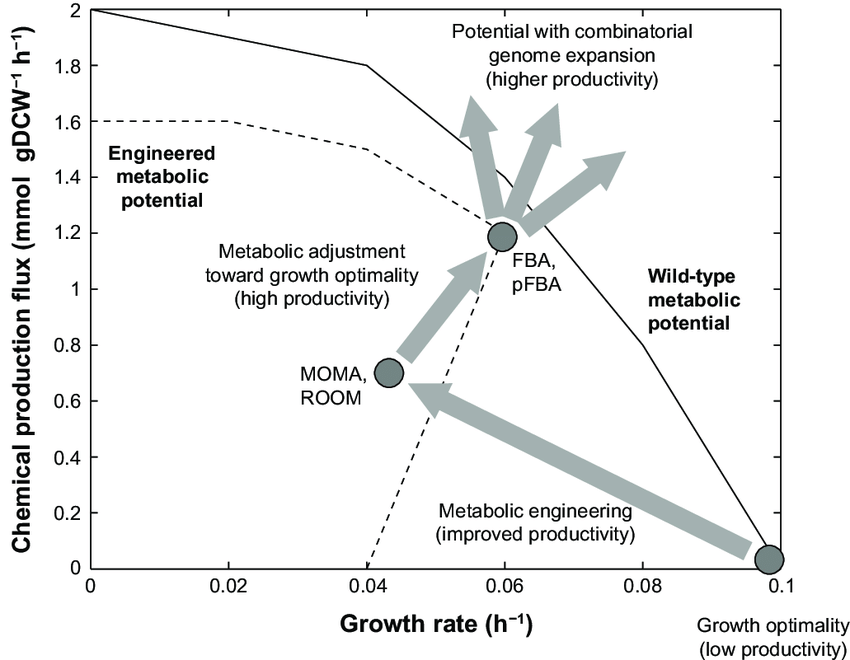

In [ ]:
import cobra
from cobra.flux_analysis import moma
import tqdm
import pandas as pd
import numpy as np

# 모델 불러오기
model = cobra.io.read_sbml_model("iAF1260.xml")

# Glucose 제약조건 설정
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
glucose_rxn.lower_bound = -10
glucose_rxn.upper_bound = -10

# 결과 저장을 위한 데이터프레임 초기화
results = pd.DataFrame(columns=['gene', 'ko_flux', 'wt_flux', 'flux_change'])

# Wild-type 솔루션 계산
wt_solution = model.optimize()
wt_fluxes = wt_solution.fluxes

# 모든 유전자에 대해 KO 시뮬레이션
for gene in tqdm.tqdm(model.genes[0:10]):
    try:
        # 유전자 KO 시뮬레이션
        with model:  # 임시 컨텍스트로 모델 복사
            gene.knock_out()  # 유전자 비활성화
            # MOMA 수행
            ko_solution = moma(model, wt_solution)
            ko_fluxes = ko_solution.fluxes

            # 결과 저장
            result = {
                'gene': gene.id,
                'ko_flux': ko_fluxes['EX_ac_e'],
                'wt_flux': wt_fluxes['EX_ac_e'],
                'flux_change': ko_fluxes['EX_ac_e'] - wt_fluxes['EX_ac_e']
            }
            results = pd.concat([results, pd.DataFrame([result])], ignore_index=True)

    except Exception as e:
        print(f"Error with gene {gene.id}: {e}")
        continue

# 결과 저장
results.to_csv('single_gene_ko_moma_results.csv', index=False)

results

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-35-6e1d636ea2b5>:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([result])], ignore_index=True)
100%|██████████| 10/10 [01:50<00:00, 11.05s/it]


,gene,ko_flux,wt_flux,flux_change
0,b2307,1.676407,1.676407,4.307665e-14
1,b0864,1.676407,1.676407,-2.220446e-16
2,b0860,1.676407,1.676407,-2.220446e-16
3,b2306,1.676407,1.676407,-2.220446e-16
4,b2310,1.676407,1.676407,-2.220446e-16
5,b0863,1.676407,1.676407,-2.220446e-16
6,b2308,1.676407,1.676407,-2.220446e-16
7,b0861,1.676407,1.676407,-2.220446e-16
8,b0862,1.676407,1.676407,-2.220446e-16
9,b2923,1.676407,1.676407,0.000000e+00
